In [29]:
import pandas as pd
import missingno as msno
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pandas_profiling import ProfileReport
from nltk import word_tokenize
import numpy as np

In [3]:
import string

import re

In [5]:
df=pd.read_csv(r'C:\Users\Loki\Downloads\fake_job\fake_job_postings.csv')

# After loading the file first we need to understand what were the columns present in dataset. So we will be using methods like info, describe,shape for better understanding.

In [6]:
df.shape

(17880, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [10]:
missing=df.isnull().sum()
missing.sort_values(ascending=False)

salary_range           15012
department             11547
required_education      8105
benefits                7210
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2695
location                 346
description                1
title                      0
fraudulent                 0
telecommuting              0
has_company_logo           0
has_questions              0
job_id                     0
dtype: int64

# It will be eassy to identify missing values with percentages in descending order

In [11]:
percentage =df.isnull().sum()/len(df)

percentage.sort_values(ascending=False)

salary_range           0.839597
department             0.645805
required_education     0.453300
benefits               0.403244
required_experience    0.394295
function               0.361018
industry               0.274217
employment_type        0.194128
company_profile        0.185011
requirements           0.150727
location               0.019351
description            0.000056
title                  0.000000
fraudulent             0.000000
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
job_id                 0.000000
dtype: float64

In [12]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Pandas profiling helps us to better understand about dataset.

In [9]:
ProfileReport(df)

# It helps us to find out whether there were  any relationship between missing data

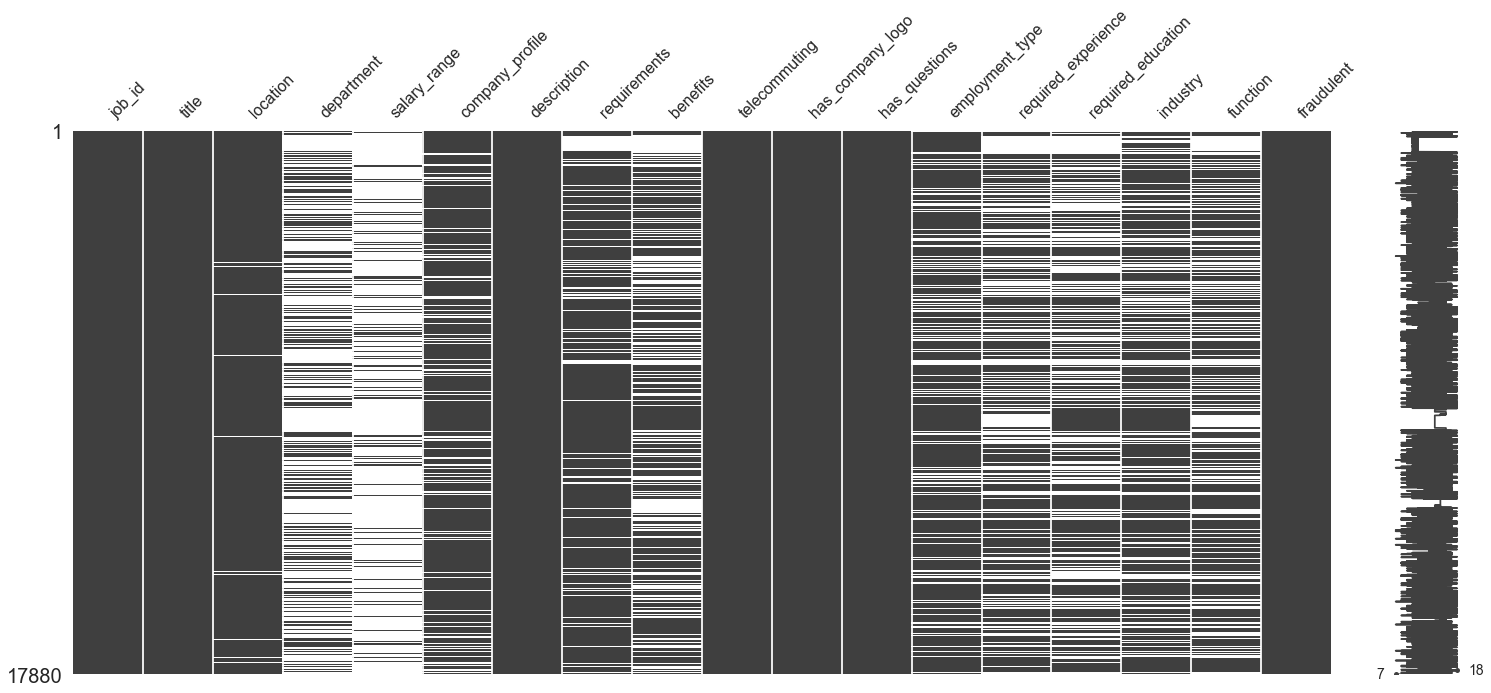

In [10]:
msno.matrix(df.sort_values('description'))

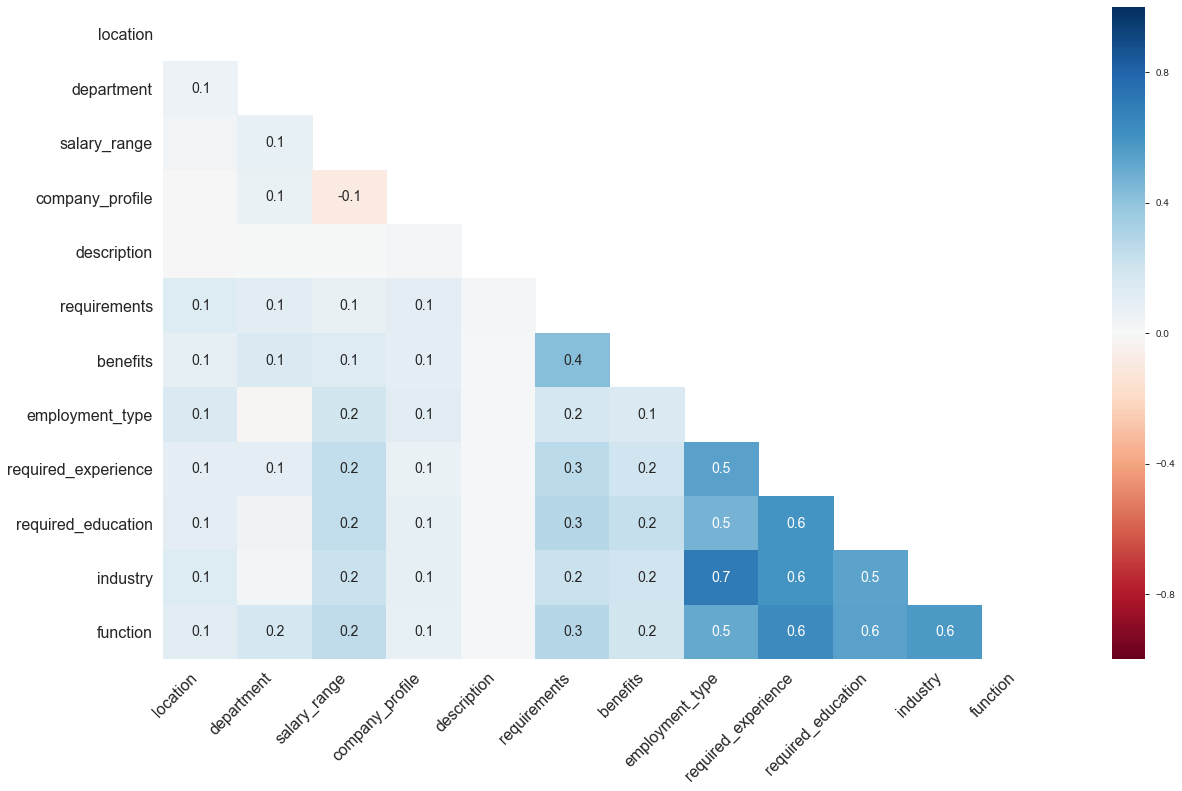

In [13]:
msno.heatmap(df)

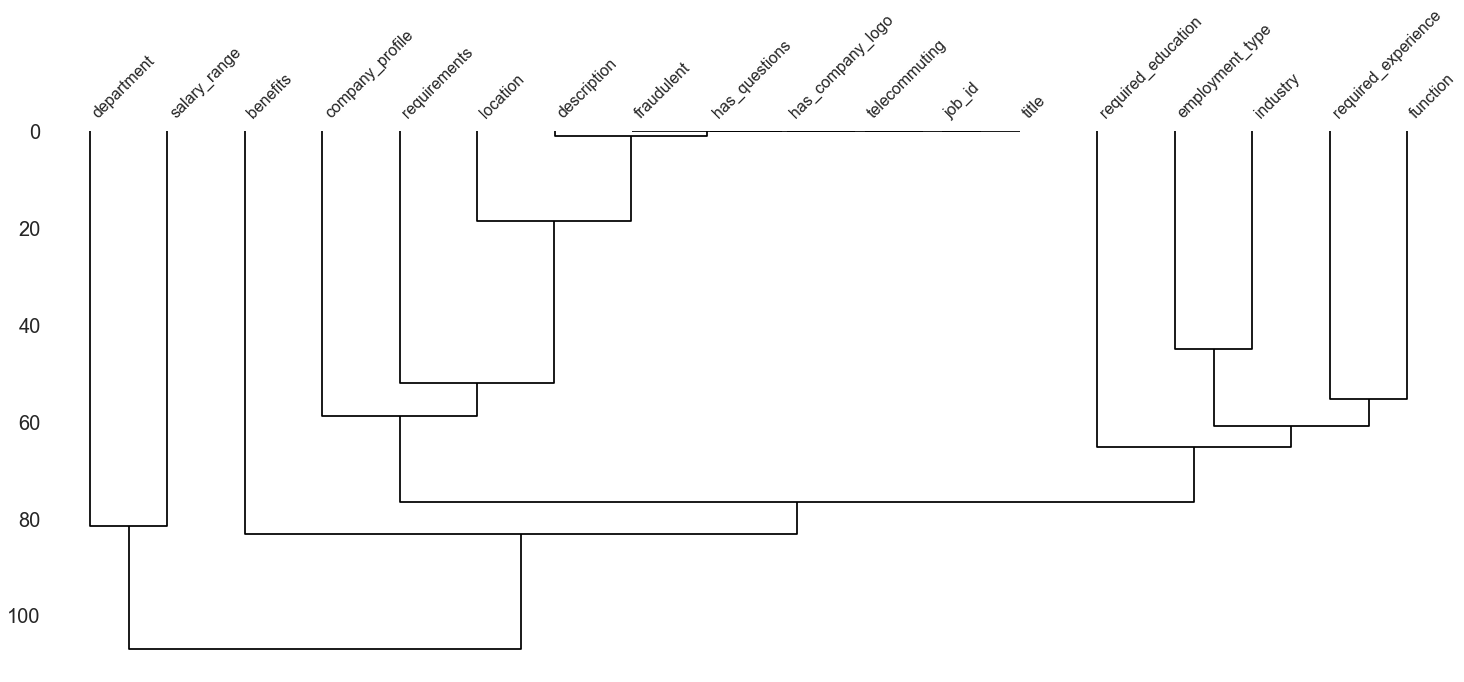

In [14]:
msno.dendrogram(df)

# Unfortunate the data contains high cardinality so were using Unspecified to fill the missing data

In [13]:
df['description'].fillna('Unspecified',inplace=True)
df['company_profile'].fillna('Unspecified',inplace=True)

df['department'].fillna('Unspecified',inplace=True)

In [14]:
df['salary_range'].fillna('Unspecified',inplace=True)

In [15]:
df['requirements'].fillna('Unspecified',inplace=True)

df['benefits'].fillna('Unspecified',inplace=True)

df['industry'].fillna('unspecified',inplace=True)

In [16]:
t=df['location'].str.split(',',n=2,expand=True)

df['Country']=t[0]

In [17]:
df['State']=t[1]

In [18]:
df['City']=t[2]

In [19]:
df=df.drop(columns='location')

In [20]:
df.replace(np.nan,'Unspecified',inplace=True)

In [21]:
df.isnull().sum()

job_id                 0
title                  0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
Country                0
State                  0
City                   0
dtype: int64

In [22]:
def cleaning_of_text(text):
    if text is not 'Unspecified':
       #removing numbers from the text 
        text=re.sub('[0-9]+','',text)
        text=text.lower()
        text=re.sub('-',' ',text)
        text=re.sub('_','',text)
        #removing  brackers 
        text=re.sub(r'[()]','',text)
        text=re.sub(r'[^\w\s]','',text)
        text=re.sub(r'\n','',text)
        text=re.sub('\xa0',' ',text)
        #replaceing the words
        tags=re.compile(r'<.*?>')
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "cannot ", text)
        text = re.sub(r"n't", " not ", text)
        text = re.sub(r"I'm", "I am", text)
        text = re.sub(r" m ", " am ", text)
        text = re.sub(r"\'re", " are ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub(r"\'ll", " will ", text)
        text=tags.sub('',text)
        return text
    else :
        return text
        
df['description_d']=df['description'].apply(lambda x : cleaning_of_text(x))


In [23]:
df['company_profile_d']=df['company_profile'].apply(lambda x: cleaning_of_text(x))

In [24]:
df['requirements_d']=df['requirements'].apply(lambda x: cleaning_of_text(x))

In [25]:
df['benefits_d']=df['benefits'].apply(lambda x: cleaning_of_text(x))

In [27]:
lemmatization=WordNetLemmatizer()

stop_words=stopwords.words('english')


In [35]:
def lemmatization_of_sentences(text):
    
    words=word_tokenize(text)
    no_stop=list(filter(lambda word: word not in  stop_words ,words))
    lemmatization__=[ lemmatization.lemmatize(word) for word in no_stop ]
    return lemmatization__

df['description_d']=df['description_d'].apply(lambda x : lemmatization_of_sentences(x))



In [40]:
df['company_profile_d']=df['company_profile_d'].apply(lambda x: lemmatization_of_sentences(x))

In [42]:
df['requirements_d']=df['requirements_d'].apply(lambda x: lemmatization_of_sentences(x))

In [43]:
df['benefits_d']=df['benefits_d'].apply(lambda x : lemmatization_of_sentences(x))

In [44]:
def lengths_of_columns(text):
    t=len(text)
    return t


df['length_description']=df['company_profile_d'].apply(lambda x: lengths_of_columns(x))

In [46]:
df['length_company_profile']=df['company_profile_d'].apply(lambda x: lengths_of_columns(x))

In [47]:
df['length_requirements']=df['requirements_d'].apply(lambda x: lengths_of_columns(x))

In [48]:
df['length_benefits']=df['benefits_d'].apply(lambda x: lengths_of_columns(x))

In [50]:
df_1=pd.DataFrame()

In [51]:
df_1=df


In [61]:
df_1=df_1.drop(columns=['company_profile','description','requirements','benefits'])

In [62]:
df_1.head()

,job_id,title,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,...,State,City,description_d,company_profile_d,requirements_d,benefits_d,length_description,length_company_profile,length_requirements,length_benefits
0,1,Marketing Intern,Marketing,Unspecified,0,1,0,Other,Internship,Unspecified,...,NY,New York,"[food, fast, growing, james, beard, award, win...","[food, weve, created, groundbreaking, award, w...","[experience, content, management, system, majo...",[Unspecified],90,90,75,1
1,2,Customer Service - Cloud Video Production,Success,Unspecified,0,1,0,Full-time,Not Applicable,Unspecified,...,,Auckland,"[organised, focused, vibrant, awesomedo, passi...","[second, world, cloud, video, production, serv...","[expect, youyour, key, responsibility, communi...","[get, usthrough, part, second, team, gainexper...",97,97,121,108
2,3,Commissioning Machinery Assistant (CMA),Unspecified,Unspecified,0,1,0,Unspecified,Unspecified,Unspecified,...,IA,Wever,"[client, located, houston, actively, seeking, ...","[valor, service, provides, workforce, solution...","[implement, pre, commissioning, commissioning,...",[Unspecified],79,79,110,1
3,4,Account Executive - Washington DC,Sales,Unspecified,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,...,DC,Washington,"[company, esri, environmental, system, researc...","[passion, improving, quality, life, geography,...","[education, bachelor, master, gi, business, ad...","[culture, anything, corporatewe, collaborative...",57,57,123,78
4,5,Bill Review Manager,Unspecified,Unspecified,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,...,FL,Fort Worth,"[job, title, itemization, review, managerlocat...","[spotsource, solution, llc, global, human, cap...","[qualificationsrn, license, state, texasdiplom...","[full, benefit, offered]",152,152,62,3


In [64]:
df_1.to_csv('Data_wrangling.csv')